# Conduct optimization 
using particle swarm optimization

(1, 2)
(3, 4)
Door>> door1: {(0, 0)~(0, 0.9)}, width: 0.9, length: 2.0
Window>> window1: {(0, 0.4)~(0, 0)}, width: 0.4, length: 0.9, height: 6.0
room1: LIVING ROOM, area: 100.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 10), (10, 10), (10, 0), 
adjacent rooms: 
room1: LIVING ROOM, area: 12.0, doors: door1, windows: window1, 
vertices: (0, 0), (0, 3), (4, 3), (4, 0), 
adjacent rooms: room2, room3, room6
room2: DINING ROOM, area: 12.0, doors: door2, windows: window2, 
vertices: (0, 3), (0, 6), (4, 6), (4, 3), 
adjacent rooms: room1, room3
room3: KITCHEN, area: 13.0, doors: door3, windows: window3, 
vertices: (4, 2), (4, 6), (8, 6), (8, 3), (5, 3), (5, 2), 
adjacent rooms: room1, room2, room4, room5, room6, room7, room8
room4: BEDROOM, area: 4.0, doors: door4, windows: window4, 
vertices: (8, 4), (8, 6), (10, 6), (10, 4), 
adjacent rooms: room3, room5
room5: MASTER BEDROOM, area: 2.0, doors: door5, windows: window5, 
vertices: (8, 3), (8, 4), (10, 4), (10, 3), 
adjacent rooms

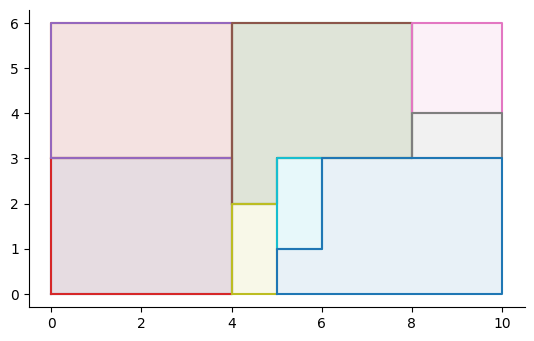

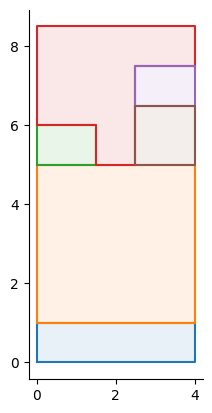

House: 8 rooms, 
adjacent matrix: [], 
adjacent list: []


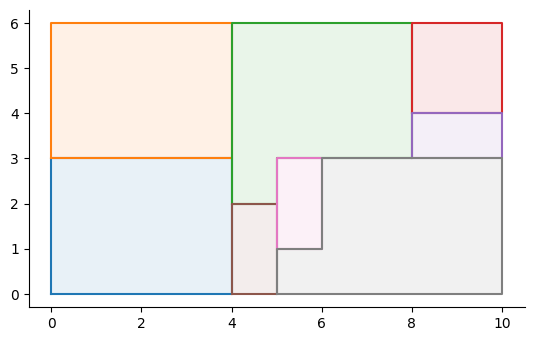

The normalized distance between the center of the master bedroom and bedroom is 0.4051545976032516
The normalized distance between the center of the master bedroom and bathroom is 0.40867998754075996
Living room's orientation is 1
Dining room has a window for natural light: 0
Normalised Ventilation(width:depth) = 0.3055555555555556
% of south-facing rooms: 0.3829787234042553
% of hall 0.9574468085106383
% of balcony: 0.2765957446808511
interior/total: 0.7833333333333333
Normalised Walking distance bedroom-bathroom: 0.8278145695364238
Normalised Walking distance bathroom-balcony: 0.348955680081508
Cluster KC-LV-DN: 6.150251730378198
Combined fitness: 5.696515000246578


In [1]:
# install if not installed
# %pip install import-ipynb
import import_ipynb
from floor_plan import Vertex
from floor_plan import Door
from floor_plan import Window
from floor_plan import Room
from floor_plan import RoomType
from floor_plan import House
from floor_plan import draw_house

from evaluator import combined_fitness

## Initialization

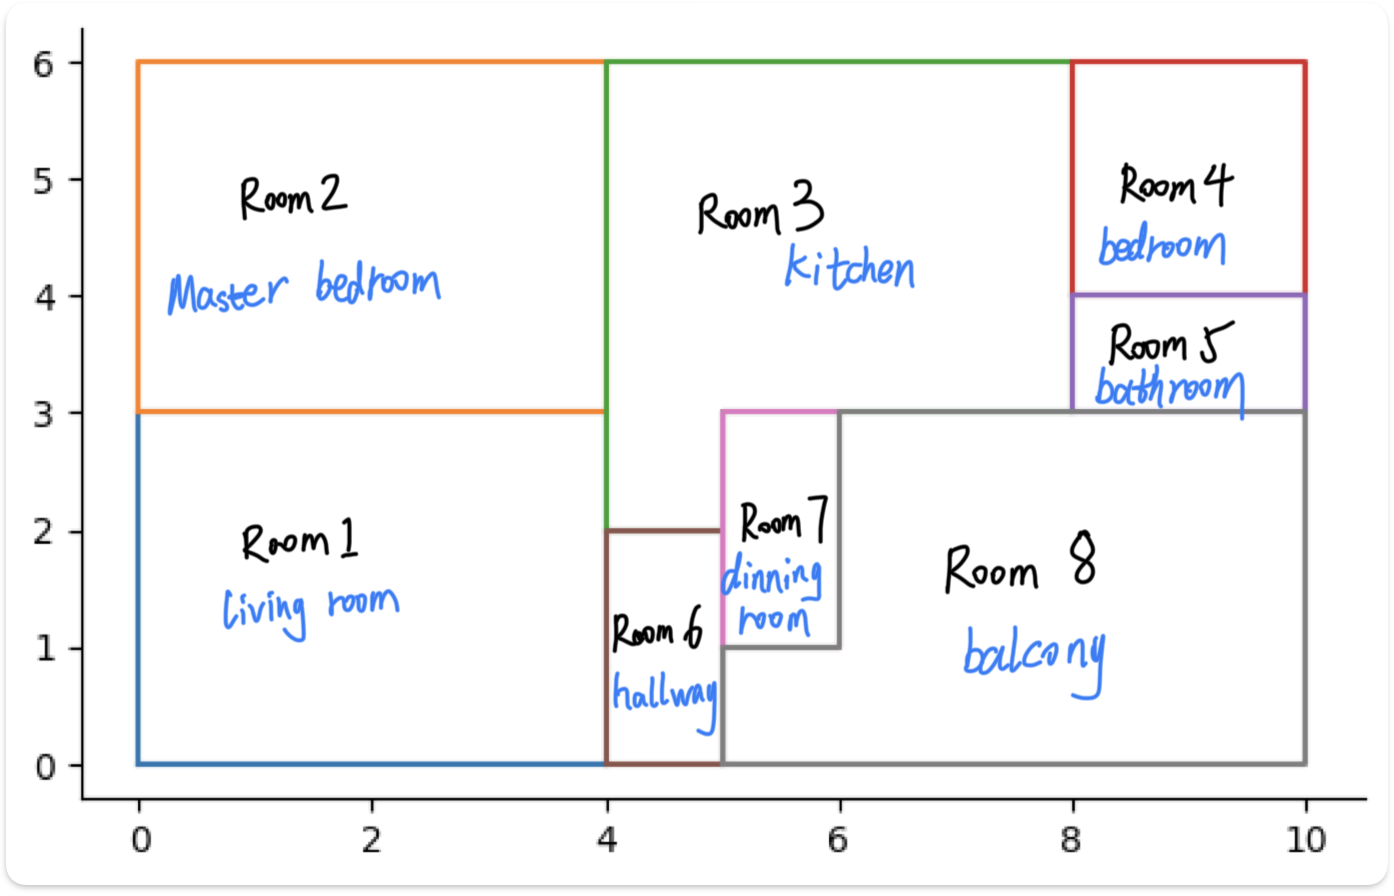

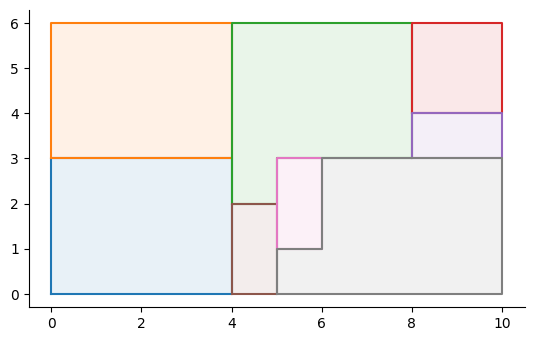

In [2]:
import random

# create new rooms with different types
# every room has a door and a window on the wall, no collapes
vertices1 = [Vertex(0, 0), Vertex(0, 3), Vertex(4, 3), Vertex(4, 0)]
vertices2 = [Vertex(0, 3), Vertex(0, 6), Vertex(4, 6), Vertex(4, 3)]
vertices3 = [Vertex(4, 2), Vertex(4, 6), Vertex(8, 6), Vertex(8, 3), Vertex(5, 3), Vertex(5, 2)]
vertices4 = [Vertex(8, 4), Vertex(8, 6), Vertex(10, 6), Vertex(10, 4)]
vertices5 = [Vertex(8, 3), Vertex(8, 4), Vertex(10, 4), Vertex(10, 3)]
vertices6 = [Vertex(4, 0), Vertex(4, 2), Vertex(5, 2), Vertex(5, 0)]
vertices7 = [Vertex(5, 1), Vertex(5, 3), Vertex(6, 3), Vertex(6, 1)]
vertices8 = [Vertex(5, 0), Vertex(5, 1), Vertex(6, 1), Vertex(6, 3), Vertex(10, 3), Vertex(10, 0)]

# Create doors for each room
door1 = Door('door1', Vertex(0, 0), Vertex(0, 1))
door2 = Door('door2', Vertex(0, 3), Vertex(0, 4))
door3 = Door('door3', Vertex(4, 2), Vertex(4, 3))
door4 = Door('door4', Vertex(8, 4), Vertex(8, 5))
door5 = Door('door5', Vertex(8, 3), Vertex(8, 4))
door6 = Door('door6', Vertex(4, 0), Vertex(4, 1))
door7 = Door('door7', Vertex(5, 1), Vertex(5, 2))
door8 = Door('door8', Vertex(5, 0), Vertex(5, 1))

# Create windows for each room
window1 = Window('window1', Vertex(0, 3), Vertex(0, 4), length=0.9, height=6.0)
window2 = Window('window2', Vertex(4, 2), Vertex(4, 3), length=0.9, height=6.0)
window3 = Window('window3', Vertex(8, 4), Vertex(8, 5), length=0.9, height=6.0)
window4 = Window('window4', Vertex(8, 3), Vertex(8, 4), length=0.9, height=6.0)
window5 = Window('window5', Vertex(5, 1), Vertex(5, 2), length=0.9, height=6.0)
window6 = Window('window6', Vertex(5, 0), Vertex(5, 1), length=0.9, height=6.0)
window7 = Window('window7', Vertex(5, 1), Vertex(6, 1), length=0.9, height=6.0)
window8 = Window('window8', Vertex(0, 0), Vertex(0, 1), length=0.9, height=6.0)

# Create rooms
living_room = Room('room1', RoomType.LIVING_ROOM, vertices1, [door1], [window1])
room2 = Room('room2', RoomType.MASTER_BEDROOM, vertices2, [door2], [window2])
room3 = Room('room3', RoomType.KITCHEN, vertices3, [door3], [window3])
room4 = Room('room4', RoomType.BEDROOM, vertices4, [door4], [window4])
room5 = Room('room5', RoomType.BATHROOM, vertices5, [door5], [window5])
room6 = Room('room6', RoomType.HALLWAY, vertices6, [door6], [window6])
room7 = Room('room7', RoomType.DINING_ROOM, vertices7, [door7], [window7])
room8 = Room('room8', RoomType.BALCONY, vertices8, [door8], [])

# Add adjacent rooms 
living_room.adjacent_rooms = [room2, room3, room6]
room2.adjacent_rooms = [living_room, room3]
room3.adjacent_rooms = [living_room, room2, room4, room5, room6, room7, room8]
room4.adjacent_rooms = [room3, room5]
room5.adjacent_rooms = [room3, room4, room8]
room6.adjacent_rooms = [living_room, room3, room7, room8]
room7.adjacent_rooms = [room3, room6, room8]
room8.adjacent_rooms = [room3, room5, room6, room7]

rooms = [living_room, room2, room3, room4, room5, room6, room7, room8]
house1 = House(rooms)
# print(house1)
draw_house(house1)

### Not ideal, but keep it for later comparison

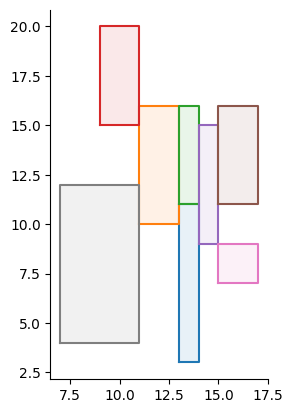

In [3]:
def generate_random_room_1(room_type, room_id):
    # later, round(random.uniform(start, end), 1)
    width = random.randint(1, 6)
    depth = random.randint(2, 8)
    x = random.randint(0, 15)
    y = random.randint(0, 15)
    vertices = [Vertex(x, y), Vertex(x, y + depth), Vertex(x + width, y + depth), Vertex(x + width, y)]
    door = Door(f'door{room_id}', Vertex(x, y), Vertex(x, y + 1))
    window = Window(f'window{room_id}', Vertex(x + width, y), Vertex(x + width, y + 1), length=0.9, height=6.0)
    return Room(f'room{room_id}', room_type, vertices, [door], [window])

def generate_random_house_1():
    room_types = [RoomType.LIVING_ROOM, RoomType.MASTER_BEDROOM, RoomType.KITCHEN, RoomType.BEDROOM, RoomType.BATHROOM, RoomType.HALLWAY, RoomType.DINING_ROOM, RoomType.BALCONY]
    random_rooms = []
    random_house = None
    while len(random_rooms) == 0 or random_house is None or random_house.overlap_check() or not random_house.room_connected_check():
        random_rooms = [generate_random_room_1(room_type, i + 1) for i, room_type in enumerate(room_types)]
        random_house = House(random_rooms)
        # draw_house(random_house)
    return random_house

draw_house(generate_random_house_1())

### New Trial

In [4]:
# # improve the random generation process
# def generator():
#     room_types = [RoomType.MASTER_BEDROOM, RoomType.KITCHEN, RoomType.BEDROOM, RoomType.BATHROOM, RoomType.HALLWAY, RoomType.DINING_ROOM, RoomType.BALCONY]
#     placed_rooms = []
#     # place the living room first
#     lv_width = random.randint(1, 6)
#     lv_depth = random.randint(2, 7)
#     x, y = 10, 10
#     vertices = [Vertex(x, y), Vertex(x, y + lv_depth), Vertex(x + lv_width, y + lv_depth), Vertex(x + lv_width, y)]
#     placed_rooms.append(vertices)

#     # place other rooms
#     for i, room_type in enumerate(room_types):
#         width = random.randint(1, 6)
#         depth = random.randint(2, 7)
#         x = random.randint(0, 15)
#         y = random.randint(0, 15)
#         vertices = [Vertex(x, y), Vertex(x, y + depth), Vertex(x + width, y + depth), Vertex(x + width, y)]
#         if 
#         placed_rooms.append(vertices)
    

## Define a new simple Room class particularly for generation

In [5]:
from shapely.geometry import Polygon

class Room:
    def __init__(self, room_type, x, y, width, height):
        self.room_type = room_type
        self.x = x
        self.y = y
        self.width = width
        self.height = height
        self.polygon = Polygon([(x, y), (x, y + height), (x + width, y + height), (x + width, y)])

    def __str__(self):
        return f"Room {self.room_type}: {self.polygon.exterior.coords[:]}"

    def __repr__(self):
        return str(self)

## Get the initial population

In [6]:
# initial population
def initial_population(population_size):
    population = []
    for i in range(population_size):
        house = generate_random_house_1()
        population.append(house)
    return population